# Virtual Watershed Platform Workflow Tutorial (https://goo.gl/A2uvyH)


The goal of today's tutorial is to walk through the full loop of interacting with the Virtual Watershed Platform (VWP) to manage all data related to a model run - initialization data, model outputs, and reference data usable in doing model evaluation. 

The sample code that we are working with today is functional and we will actually run the code as we go through the workshop so that you can see what a full automated model execution process looks like in the context of interacting with the data management, discovery and access services provided by the VWP. 

While the sample code we are working with is written in the Python programming language, as a web-services based process, any programming language that supports interacting with remote web services (pretty much any modern programming language) can be used to develop a model automation process like this one. 

A key thing to remember is that computer code like this is the foundation for graphical user interfaces that may be built for routine model execution - like the web interface demonstrated in yesterday's presentation. 


In [35]:
from IPython.display import Image
Image(url='https://dl.dropboxusercontent.com/u/2066380/ModelArc.png')

The figure above is a visual representation of the different phases in the scientific modeling process in which the VWP can provide or ingest data in support of the entire process *and* enable sharing of the data with other models, analysis and visualization systems, and other research data networks. 

The outline for today's tutorial/code demonstration is as follows:

0. Set up some local capabilities within the program to enable execution. 

1. Download, install and testing of a model that will be used in the demonstration. In this case we are using the TOPKAPI hydrologic model as a demonstration model that has already been implemented with support for the Python programming language - PyTOPKAPI. 

2. Create a specified model run and add model initialization data to the VWP.

3. Create a specified model run and add model initialization data to the VWP.

4. Retrieve Data from Virtual Watershed Platform And Convert for Model Use.

5. Configure model.

6. Run model.

7. Process output data for upload.

8. Upload output dataset w/ metadata package to VWP.

9. Execute a model assessment process integrated with the VWP.


# 1. Set some local variable(s)

In [9]:
#To start, we need to establish a "local root"
#This is because we are going to be doing a lot of jumping around in directories, so having a base directory is important.

import os
local_root = os.getcwd()
print local_root

/Users/kb/Repos/wc-wave


# 2. Download, install and test the model we will use in the demo

To run the sample model system you need to install the PyTOPKAPI module and it's associated tutorial data on your local computer. The following code block will download and install the needed files in the current working directory. This codeblock is accessing the files available for download from the pyTOPKAPI GitHub repository: https://github.com/sahg/PyTOPKAPI/downloads

From the TOPKAPI Web Page:

> PyTOPKAPI is a BSD licensed Python library implementing the TOPKAPI Hydrological model (Liu and Todini, 2002). The model is a physically-based and fully distributed hydrological model, which has already been successfully applied in several countries around the world (Liu and Todini, 2002; Bartholomes and Todini, 2005; Liu et al., 2005; Martina et al., 2006; Vischel et al., 2008, Sinclair and Pegram, 2010).

In the context of this workshop PyTOPKAPI is a hydrlolgic model that is simple to embed into the complete
workflow illustrated. In practice any number of other models may be substituted for the use of PyTOPKAPI as
illustrated here. 

## Note on Other dependencies

Given the common use of geospatial data in modeling and the adoption of NetCDF as a common interchange and
storage format within the Virtual Watershed Platform, the Geospatial Data Abstraction Library (GDAL) and netcsf4
are modules that you will commonly use in automating the data manipulation elements of your workflow. 

* gdal: 
    * `conda install gdal` or `conda update gdal`
* netcdf4: 
    * `conda install netcdf4` or `conda update netcdf4`



## Download and extract the required module and tutorial data

In [10]:
import urllib2
import zipfile

!pip install https://github.com/downloads/sahg/PyTOPKAPI/PyTOPKAPI-0.2.0.zip

# download the pyTOPKAPI tutorial data
pyTOPKAPITutorial = urllib2.urlopen("https://github.com/downloads/sahg/PyTOPKAPI/PyTOPKAPI-Example-0.2.0.zip")
output = open('PyTOPKAPI-Example-0.2.0.zip','wb')
output.write(pyTOPKAPITutorial.read())
output.close()

# unzip the pyTOPKAPI tutorial data
with zipfile.ZipFile('PyTOPKAPI-Example-0.2.0.zip', "r") as z:
    z.extractall()




  Using cached https://github.com/downloads/sahg/PyTOPKAPI/PyTOPKAPI-0.2.0.zip
  Running setup.py bdist_wheel for PyTOPKAPI
  Stored in directory: /Users/kb/Library/Caches/pip/wheels/17/4d/47/cdd2432ba72385c1c39f9a2ed21b68d0bd1a60660d3b4cedc7
Successfully built PyTOPKAPI


## test the local model installation using the sample tutorial code

In [11]:
import pytopkapi
os.chdir(local_root)
# change into the root directory for the example code
%cd "TOPKAPI_Example"

# run a model simulation using the configuration in TOPKAPI.ini
pytopkapi.run('run_the_model/TOPKAPI.ini')

# plot the simulation results (rainfall-runoff graphics) using the
# config in plot_Qsim_Qobs_Rain.ini
from pytopkapi.results_analysis import plot_Qsim_Qobs_Rain

plot_Qsim_Qobs_Rain.run('analyse_the_results/plot_Qsim_Qobs_Rain.ini')


# plot the simulation results (soil moisture maps) using the config in
# plot_soil_moisture_maps.ini
from pytopkapi.results_analysis import plot_soil_moisture_maps

plot_soil_moisture_maps.run('analyse_the_results/plot_soil_moisture_maps.ini')

%cd ".."

# Initial execution of this test generated errors relating to loading the matplotlib._png module. The problem was resolved following the solution provided here: 
# http://stackoverflow.com/questions/28848270/import-matplotlib-pyplot-gives-importerror-dlopen-library-not-loaded-libpng1


/Users/kb/Repos/wc-wave/TOPKAPI_Example
Read the file  run_the_model/TOPKAPI.ini
Read the forcing data
Pretreatment of input data
Max L= 0.81
Max Ks= 0.03924
Max n_o= 0.1
Max n_c= 0.085
external flows will be taken into account for cell no 3138  coordinates ( -256314.83 , -3149857.34 )
Initialize from parms
** NB_CELL= 3544
** NB_TIME_STEP= 170
--> SIMULATIONS <--
1 / 170
2 / 170
3 / 170
4 / 170
5 / 170
6 / 170
7 / 170
8 / 170
9 / 170
10 / 170
11 / 170
12 / 170
13 / 170
14 / 170
15 / 170
16 / 170
17 / 170
18 / 170
19 / 170
20 / 170
21 / 170
22 / 170
23 / 170
24 / 170
25 / 170
26 / 170
27 / 170
28 / 170
29 / 170
30 / 170
31 / 170
32 / 170
33 / 170
34 / 170
35 / 170
36 / 170
37 / 170
38 / 170
39 / 170
40 / 170
41 / 170
42 / 170
43 / 170
44 / 170
45 / 170
46 / 170
47 / 170
48 / 170
49 / 170
50 / 170
51 / 170
52 / 170
53 / 170
54 / 170
55 / 170
56 / 170
57 / 170
58 / 170
59 / 170
60 / 170
61 / 170
62 / 170
63 / 170
64 / 170
65 / 170
66 / 170
67 / 170
68 / 170
69 / 170
70 / 170
71 / 170
72 

# Now on to the main program

In [12]:
import requests
import json
import pandas
import tables
import scipy
import numpy
import uuid
import os
import shutil


In [13]:
# if you didn't successfully execute the "Prerequisites" code block above this will fail
import pytopkapi

# 3. Create a specified model run and add model initialization data to the VWP.

## Create a new model run into which all associated data and documentation (metadata) will be inserted 

In [14]:
# initial model creation

# When we create a model run, we need to pass a unique description.
# As such, we will generate a random description using a UUID. That having been said
# you can provide any valid unique name for your model
newuuid = str(uuid.uuid1())
modeldata = json.dumps(
    {"description": "PyTOPKAPI Upload Demo " + newuuid,
     "researcher_name":"Lorem Ipsum",
     "model_run_name":"pytopkapi inputs example "+newuuid,
     "model_keywords":"pytopkapi"})

print modeldata

#initialize the model run uuid to a blank string
model_run_uuid = ""

#VWP Login/Authentication information
username = 'wcwave.demo@gmail.com'
password = 'demoPassword1!'
vwpBaseURL = "https://vwp-dev.unm.edu"
loginurl = vwpBaseURL + "/apilogin"
newmodelurl = vwpBaseURL + "/apps/vwp/newmodelrun"

#Create a session
s = requests.Session()
s.auth = (username, password)
s.verify = False

l = s.get(loginurl)
if l.status_code == 200:
    print "********************"
    print "* Create model run *"
    print "********************"
    # calling <vwpBaseURL>/apps/vwp/newmodelrun with our model data from above
    createmodel = s.post(newmodelurl, data=modeldata)
    if createmodel.status_code == 200:
        print "Modelrun creation successful"
        # With a model run created, we now have a valid model run uuid that we will be using throughout this model run
        # For that reason, we store it away.
        model_run_uuid = createmodel.text
        print model_run_uuid
    else:
        print "*****************************"
        print "* Modelrun creation failure *"
        print "*****************************"
        print createmodel.text
else:
    print "*******************"
    print "*  Login Failure  *"
    print "*******************"
    print l.text

{"model_keywords": "pytopkapi", "model_run_name": "pytopkapi inputs example 9542e178-6aea-11e5-9129-14109fd65e5d", "description": "PyTOPKAPI Upload Demo 9542e178-6aea-11e5-9129-14109fd65e5d", "researcher_name": "Lorem Ipsum"}
********************

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



* Create model run *
********************
Modelrun creation successful
e8f7024d-df0b-4238-b914-a075b1f64f15


## Create documentation (metadata) that will be uploaded to the VWP

In [15]:
#define json and metadata templates

#Template for vwp data we will use for all uploads
#This template is set with inputs in mind; later we will return to these and replace them with outputs
basejson = json.dumps(
    {
        "description": "$description", 
        "records": "1", 
        "taxonomy": "$taxonomy", 
        "basename":"$basename", 
        "parent_model_run_uuid": "$parent_model_run_uuid", 
        "apps":["vwp"], 
        "model_set_taxonomy":"$model_set_taxonomy",
        "model_run_uuid": "$model_run_uuid",
        "sources":[
            {
             "mimetype": "$mimetype", 
             "files": ["$inputFilePath"], 
             "set": "original", 
             "external": "False",
             "extension": "$ext"}
            ], 
        "model_set": "inputs", 
        "spatial": {
            "geomtype": "grid", 
            "records": "1", 
            "epsg": "4326", 
            "features": "1", 
            "bbox": "-114.323106,38.9831811224489,-114.21300990625,39.028019"},
        "formats":["$formats"], 
        "services": [], 
        "model_set_type": "viz", 
        "standards": ["FGDC-STD-001-1998", "ISO-19115:2003", "ISO-19119", "ISO-19110"], 
        "active": "true", 
        "model_vars": " ", 
        "categories": [
            {
                "state": "demo", 
                "modelname": "demo", 
                "location": "demo"
            }], 
        "metadata": {
            "xml" : "$xml", 
            "upgrade": "true", 
            "standard": "FGDC-STD-001-1998"}
    })
#we also want to add properly formatted metadata to the dataset
#Included is a form for metadata in the fgdc-std-001-1998 standard
#Information can be filled in as needed
xml_txt = """<!DOCTYPE metadata SYSTEM 'http://www.fgdc.gov/metadata/fgdc-std-001-1998.dtd'>
<metadata>
    <idinfo>
        <citation>
            <citeinfo>
                <origin>Unknown</origin>
                <pubdate>Unknown</pubdate>
                <title>Unknown</title>
                <geoform>Unknown</geoform>
                <pubinfo>
                    <pubplace>Unknown</pubplace>
                    <publish>Unknown</publish>
                </pubinfo>
            </citeinfo>
        </citation>
        <descript>
            <abstract>Unknown</abstract>
            <purpose>Unknown</purpose>
            <supplinf>Unknown</supplinf>
        </descript>
        <timeperd>
            <timeinfo>
                <rngdates>
                    <begdate>Unknown</begdate>
                    <enddate>Unknown</enddate>
                </rngdates>
            </timeinfo>
            <current>Unknown</current>
        </timeperd>
        <status>
            <progress>Complete</progress>
            <update>Unknown</update>
        </status>
        <spdom>
            <bounding>
                <westbc>$westbc</westbc>
                <eastbc>$eastbc</eastbc>
                <northbc>$northbc</northbc>
                <southbc>$southbc</southbc>
            </bounding>
        </spdom>
        <keywords>
            <theme>
                <themekt>Unknown</themekt>
                <themekey>Unknown</themekey>
            </theme>
            <theme>
                <themekt>Unknown</themekt>
                <themekey>Unknown</themekey>
            </theme>
            <theme>
                <themekt>Unknown</themekt>
                <themekey>Unknown</themekey>
                <themekey>Unknown</themekey>
            </theme>
            <place>
                <placekt>None</placekt>
                <placekey>Unknown</placekey>
            </place>
        </keywords>
        <accconst>Unknown</accconst>
        <useconst>Unknown</useconst>
        <ptcontac>
            <cntinfo>
                <cntperp>
                    <cntper>Unknown</cntper>
                </cntperp>
                <cntaddr>
                    <addrtype>Unknown</addrtype>
                    <address>Unknown</address>
                    <city>Unknown</city>
                    <state>Unknown</state>
                    <postal>Unknown</postal>
                    <country>Unknown</country>
                </cntaddr>
                <cntvoice>Unknown</cntvoice>
                <cntemail>Unknown</cntemail>
            </cntinfo>
        </ptcontac>
        <native>Unknown</native>
    </idinfo>
    <dataqual>
        <logic>Unknown</logic>
        <complete>Unknown</complete>
        <posacc>
            <horizpa>
                <horizpar>Unknown</horizpar>
                <qhorizpa>
                    <horizpav>0.0</horizpav>
                    <horizpae>Unknown</horizpae>
                </qhorizpa>
            </horizpa>
        </posacc>
        <lineage>
            <srcinfo>
                <srccite>
                    <citeinfo>
                        <origin>Unknown</origin>
                        <pubdate>Unknown</pubdate>
                        <title>Unknown</title>
                        <pubinfo>
                            <pubplace>Unknown</pubplace>
                            <publish>Unknown</publish>
                        </pubinfo>
                    </citeinfo>
                </srccite>
                <typesrc>Unknown</typesrc>
                <srctime>
                    <timeinfo>
                        <rngdates>
                            <begdate>Unknown</begdate>
                            <enddate>Unknown</enddate>
                        </rngdates>
                    </timeinfo>
                    <srccurr>Unknown</srccurr>
                </srctime>
                <srccitea>Unknown</srccitea>
                <srccontr>Unknown</srccontr>
            </srcinfo>
            <procstep>
                <procdesc>Unknown</procdesc>
                <procdate>Unknown</procdate>
                <proccont>
                    <cntinfo>
                        <cntorgp>
                            <cntorg>Unknown</cntorg>
                        </cntorgp>
                        <cntpos>Unknown</cntpos>
                        <cntaddr>
                            <addrtype>Unknown</addrtype>
                            <address>Unknown</address>
                            <address>Unknown</address>
                            <city>Unknown</city>
                            <state>Unknown</state>
                            <postal>Unknown</postal>
                            <country>Unknown</country>
                        </cntaddr>
                        <cntvoice>Unknown</cntvoice>
                        <cntfax>Unknown</cntfax>
                        <cntemail>Unknown</cntemail>
                        <hours>Unknown</hours>
                    </cntinfo>
                </proccont>
            </procstep>
        </lineage>
    </dataqual>
    <spdoinfo>
        <indspref>Unknown</indspref>
        <direct>Raster</direct>
        <rastinfo>
            <rasttype>Pixel</rasttype>
            <rowcount>1</rowcount>
            <colcount>1</colcount>
            <vrtcount>1</vrtcount>
        </rastinfo>
    </spdoinfo>
    <eainfo>
        <detailed>
            <enttyp>
                <enttypl>Unknown</enttypl>
                <enttypd>Unknown</enttypd>
                <enttypds>Unknown</enttypds>
            </enttyp>
            <attr>
                <attrlabl>Unknown</attrlabl>
                <attrdef>Unknown</attrdef>
                <attrdefs>Unknown</attrdefs>
                <attrdomv>
                    <rdom>
                        <rdommin>Unknown</rdommin>
                        <rdommax>Unknown</rdommax>
                        <attrunit>Unknown</attrunit>
                    </rdom>
                </attrdomv>
            </attr>
        </detailed>
    </eainfo>
    <distinfo>
        <distrib>
            <cntinfo>
                <cntorgp>
                    <cntorg>Unknown</cntorg>
                </cntorgp>
                <cntpos>Unknown</cntpos>
                <cntaddr>
                    <addrtype>Unknown</addrtype>
                    <address>Unknown</address>
                    <address>Unknown</address>
                    <city>Unknown</city>
                    <state>Unknown</state>
                    <postal>Unknown</postal>
                    <country>Unknown</country>
                </cntaddr>
                <cntvoice>Unknown</cntvoice>
                <cntfax>Unknown</cntfax>
                <cntemail>Unknown</cntemail>
                <hours>Unknown</hours>
            </cntinfo>
        </distrib>
        <distliab>Unknown</distliab>
        <stdorder>
            <digform>
                <digtinfo>
                    <formname>Unknown</formname>
                    <transize>1</transize>
                </digtinfo>
                <digtopt>
                    <offoptn>
                        <offmedia>Unknown</offmedia>
                        <recfmt>Unknown</recfmt>
                    </offoptn>
                </digtopt>
            </digform>
            <fees>Unknown</fees>
        </stdorder>
    </distinfo>
    <metainfo>
        <metd>20130116</metd>
        <metc>
            <cntinfo>
                <cntorgp>
                    <cntorg>Unknown</cntorg>
                </cntorgp>
                <cntpos>Unknown</cntpos>
                <cntaddr>
                    <addrtype>Unknown</addrtype>
                    <address>Unknown</address>
                    <address>Unknown</address>
                    <address>Unknown</address>
                    <city>Unknown</city>
                    <state>Unknown</state>
                    <postal>Unknown</postal>
                </cntaddr>
                <cntvoice>Unknown</cntvoice>
                <cntfax>Unknown</cntfax>
                <cntemail>Unknown</cntemail>
                <hours>Unknown</hours>
            </cntinfo>
        </metc>
        <metstdn>Unknown</metstdn>
        <metstdv>Unknown</metstdv>
        <mettc>local time</mettc>
        <metsi>
            <metscs>Unknown</metscs>
            <metsc>Unknown</metsc>
            <metshd>Unknown</metshd>
        </metsi>
    </metainfo>
</metadata>"""
xml_txt = xml_txt.replace('\n', '')
#print xml_txt
#We need to give the xml our spatial bounding box as well before we insert it in to the json
xml_txt = xml_txt.replace('$westbc', '-114.323106')
xml_txt = xml_txt.replace('$eastbc', '-114.21300990625')
xml_txt = xml_txt.replace('$northbc', '39.028019')
xml_txt = xml_txt.replace('$southbc', '38.9831811224489')
basejson = basejson.replace('$xml', xml_txt)

## Add initialization data and associated metadata to the VWP and associate with the previously created model run ID

In [16]:
#data upload
print model_run_uuid

os.chdir(local_root)
%cd "TOPKAPI_Example/run_the_model"
# To start, we want to get our sample data
# We change directories to the folder with the data we want and create a list of the files
# Each item has both the original file name and a VWP-acceptable extension
# We will be appending this extension on to the file name in order to simulate converting these files to valid VWP data
inputfiles = [('forcing_variables/rainfields.h5', 'nc'),
              ('forcing_variables/ET.h5','nc'),
              ('forcing_variables/external_lesotho_flows.dat','ascii'),
              ('TOPKAPI.ini','txt'),
              ('parameter_files/global_param.dat','ascii'),
              ('parameter_files/cell_param.dat','ascii')]

#VWP url paths
data_upload_url = vwpBaseURL + "/apps/vwp/data"
insert_dataset_url = vwpBaseURL + "/apps/vwp/datasets"

#Make a directory to copy files to for uploading
#We will copy them with a new extension, effectively converting them
currentdir = os.getcwd()
uploaddir = currentdir + "/uploads"
if not os.path.exists(uploaddir):
    os.mkdir(uploaddir)

l = s.get(loginurl)
if l.status_code == 200:
    first_two_of_uuid = model_run_uuid[:2]
    #We need to upload each file with the same uuid
    uploadpayload={"name": "demo", "modelid": model_run_uuid}
    for inputfile in inputfiles:
        path = inputfile[0]
        ext = inputfile[1]
        # "convert" for integration in to VWP
        cppath = uploaddir + "/" + os.path.split(path)[1] + '.' + ext
        shutil.copyfile(path, cppath)
        #create a filepath for the VWP to save files to
        basepath = os.path.split(cppath)[1]
        basename = os.path.splitext(basepath)[0]
        inputFilepath = os.path.join("/geodata/watershed-data",first_two_of_uuid,model_run_uuid,basepath).replace("\\", "/")
        print inputFilepath
        openpath = cppath
        print openpath
        files = {'file': open(openpath,'rb')}
        #post the file to the virtual watershed using the copied file
        r = s.post(data_upload_url, files=files, data=uploadpayload)
        if r.status_code == 200:
            print "Upload file success"
            tax = ''
            if ext == 'nc':
                tax = 'netcdf'
                mime = 'application/x-netcdf'
            else:
                tax = 'file'
                mime = 'text/plain'
            #with the file uploaded, we now need to insert our data
            #using our base set of information, we fill in the non-generic information programatically
            inputfile_json = basejson
            inputfile_json = inputfile_json.replace('$parent_model_run_uuid', model_run_uuid)
            inputfile_json = inputfile_json.replace('$inputFilePath', inputFilepath)
            inputfile_json = inputfile_json.replace('$model_run_uuid', model_run_uuid)
            inputfile_json = inputfile_json.replace('$description', "Demo- " + basename)
            #inputfile_json = inputfile_json.replace('"services": []', '"services": ["wms", "wcs"]')
            inputfile_json = inputfile_json.replace('$basename', basename)
            inputfile_json = inputfile_json.replace('$taxonomy', tax)
            inputfile_json = inputfile_json.replace('$model_set_taxonomy', 'grid')
            inputfile_json = inputfile_json.replace('$mimetype', 'application/x-netcdf')
            inputfile_json = inputfile_json.replace('$ext', ext)
            inputfile_json = inputfile_json.replace('$formats', ext)
            #print inputfile_json
            #with the dataset information updated, we can upload
            insert = s.put(insert_dataset_url, data=inputfile_json)
            if insert.status_code == 200:
                print "Insert Successful!"
                print insert.text
            else:
                print "******************"
                print "* Insert Failure *"
                print "******************"
                print insert.text
        else:
            print "***********************"
            print "* Upload file failure *"
            print "***********************"
            print r.text
    # End for 
else:
    print "*******************"
    print "*  Login Failure  *"
    print "*******************"
    print l.text
os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15
/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/rainfields.h5.nc

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model/uploads/rainfields.h5.nc
Upload file success
Insert Successful!

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



1f106693-9c96-4a64-bf6c-60a21d5040f0
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/ET.h5.nc
/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model/uploads/ET.h5.nc
Upload file success
Insert Successful!

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



92c649b1-0d3d-4419-96b2-6479bb7ef515
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/external_lesotho_flows.dat.ascii
/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model/uploads/external_lesotho_flows.dat.ascii
Upload file success
Insert Successful!

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



e6b5f7c3-327c-40c1-9103-eac86007dbbf
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/TOPKAPI.ini.txt
/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model/uploads/TOPKAPI.ini.txt
Upload file success
Insert Successful!

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



75f62d2e-8eb8-4ecd-8426-f7c70624fd6e
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/global_param.dat.ascii
/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model/uploads/global_param.dat.ascii
Upload file success
Insert Successful!

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



639f434d-23c2-4405-9082-4f8abd426081
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/cell_param.dat.ascii
/Users/kb/Repos/wc-wave/TOPKAPI_Example/run_the_model/uploads/cell_param.dat.ascii
Upload file success
Insert Successful!
4f988763-3029-4883-a88a-e83a27bda0b0


/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [17]:
os.chdir(local_root)
!ls

October Workbook.ipynb      PyTOPKAPI-0.2.0.zip
PRMS                        PyTOPKAPI-Example-0.2.0.zip
PRMS_Adaptor                README
PyTOPKAPI-0.2.0             TOPKAPI_Example


# 4. Retrieve Data from Virtual Watershed Platform And Convert for Model Use

In [18]:
print model_run_uuid


import requests
import json
import os
import shutil

#For the purposes of this, we will use simple functions to help download
#Programming like this makes code easier to read
#first, a "helper function" that encapsulates the necessary steps to download a file given a filename and url
def download(name, url):
    r = requests.get(url)
    with open(name, 'wb') as f:
        f.write(r.content)
        f.close
    
#This is our "main" function for downloading our inputs
#It will perform a search on the virtual watershed for a uuid and download all inputs with that uuid
def download_inputs(vwpBaseURL, uuid):
    #build the search
    dlurl = vwpBaseURL + "/apps/vwp/search/datasets.json"
    payload = {}
    payload['model_run_uuid'] = uuid
    payload['model_set'] = 'inputs'
    
    #establish a directory to download to
    downloaddir = os.getcwd() + "/model-" + uuid
    if not os.path.exists(downloaddir):
        os.mkdir(downloaddir)
    
    #run the search
    l = requests.get(dlurl, params=payload)
    if l.status_code == 200:
        l_json = json.loads(l.text)
        #Search returns a json that we can parse in order to access the correct files
        for i in l_json['results']:
            name = i['name']
            url = ""
            if i['taxonomy'] == 'netcdf':
                url = i['downloads'][0]['nc']
            else:
                if 'ascii' in i['downloads'][0]:
                    url = i['downloads'][0]['ascii']
                else:
                    url = i['downloads'][0]['txt']
            print name
            print url
            #run our download helper function once we get the name and url
            download(downloaddir + "/" + name, url)
            #normally you would run a process to convert this file into format needed by model
            #but because of how we "converted" before, we just need to download as the correct file name!
    print os.listdir(downloaddir)
            
os.chdir(local_root)
#By separating our functionality from our main execution block, we make things much easier to read
#Go to our local root and search for files
download_inputs("http://vwp-dev.unm.edu", model_run_uuid)

os.chdir(local_root)


e8f7024d-df0b-4238-b914-a075b1f64f15
ET.h5
http://vwp-dev.unm.edu/apps/vwp/datasets/92c649b1-0d3d-4419-96b2-6479bb7ef515/ET.h5.original.nc
TOPKAPI.ini
http://vwp-dev.unm.edu/apps/vwp/datasets/75f62d2e-8eb8-4ecd-8426-f7c70624fd6e/TOPKAPI.ini.original.txt
cell_param.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/4f988763-3029-4883-a88a-e83a27bda0b0/cell_param.dat.original.ascii
external_lesotho_flows.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/e6b5f7c3-327c-40c1-9103-eac86007dbbf/external_lesotho_flows.dat.original.ascii
global_param.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/639f434d-23c2-4405-9082-4f8abd426081/global_param.dat.original.ascii
rainfields.h5
http://vwp-dev.unm.edu/apps/vwp/datasets/1f106693-9c96-4a64-bf6c-60a21d5040f0/rainfields.h5.original.nc
[u'cell_param.dat', u'ET.h5', u'external_lesotho_flows.dat', u'global_param.dat', u'rainfields.h5', u'TOPKAPI.ini']


# 5. Configure model

In [37]:
#To run the model, we need a configuration in the form of an ini file
#We will automatically generate a configuration file for our model run here
import os

os.chdir(local_root)
os.chdir("model-"+model_run_uuid)

ini_text = """# This ini files describes the locations of the model input and output files
# and controls some of the model configuration. Paths may be specified relative
# to the location of the script reading this file or in absolute terms. 
# At this stage a '/' must be used as the directory separator (even on Windows)

[input_files]
file_global_param=global_param.dat
file_cell_param=cell_param.dat
file_rain=rainfields.h5
file_ET=ET.h5

[output_files]
file_out=Results/Example_simulation_results.h5
append_output=False

[groups]
group_name=sample_event

[external_flow]
external_flow=True
Xexternal_flow=-256314.83
Yexternal_flow=-3149857.34
file_Qexternal_flow=external_lesotho_flows.dat

[numerical_options]
solve_s=1
solve_o=1
solve_c=1
only_channel_output=False

[calib_params]
fac_L=1.
fac_Ks=60.0
fac_n_o=1.0
fac_n_c=1.7
"""

#write the ini text to a file
filename = "TOPKAPI_Demo_" + model_run_uuid + ".ini"
with open(filename, 'w') as f:
    f.write(ini_text)
    f.close()
    
os.chdir(local_root)

 # 6. Run model

In [20]:
#using the configuration we've made, we can run the model as we did in the example earlier
import os
import pytopkapi

os.chdir(local_root)
os.chdir("model-"+model_run_uuid)

filepath = "TOPKAPI_Demo_" + model_run_uuid + ".ini"

pytopkapi.run(filepath)

os.chdir(local_root)

Read the file  TOPKAPI_Demo_e8f7024d-df0b-4238-b914-a075b1f64f15.ini
Results has been created
Read the forcing data
Pretreatment of input data
Max L= 0.81
Max Ks= 0.03924
Max n_o= 0.1
Max n_c= 0.085
external flows will be taken into account for cell no 3138  coordinates ( -256314.83 , -3149857.34 )
Initialize from parms
** NB_CELL= 3544
** NB_TIME_STEP= 170
--> SIMULATIONS <--
1 / 170
2 / 170
3 / 170
4 / 170
5 / 170
6 / 170
7 / 170
8 / 170
9 / 170
10 / 170
11 / 170
12 / 170
13 / 170
14 / 170
15 / 170
16 / 170
17 / 170
18 / 170
19 / 170
20 / 170
21 / 170
22 / 170
23 / 170
24 / 170
25 / 170
26 / 170
27 / 170
28 / 170
29 / 170
30 / 170
31 / 170
32 / 170
33 / 170
34 / 170
35 / 170
36 / 170
37 / 170
38 / 170
39 / 170
40 / 170
41 / 170
42 / 170
43 / 170
44 / 170
45 / 170
46 / 170
47 / 170
48 / 170
49 / 170
50 / 170
51 / 170
52 / 170
53 / 170
54 / 170
55 / 170
56 / 170
57 / 170
58 / 170
59 / 170
60 / 170
61 / 170
62 / 170
63 / 170
64 / 170
65 / 170
66 / 170
67 / 170
68 / 170
69 / 170
70 / 170

# 7. Process output data for upload

In [21]:
#Normally here you would do format conversion for use in the VWP
#We will do that conversion, as before, in the upload step

# Generate metadata

In [22]:
print model_run_uuid

os.chdir(local_root)

#Our old metadata works fine for this
#We will replace instances of input with output for clarity with the VWP
output_json = basejson
output_json = output_json.replace("input", "output")
print output_json

os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15
{"model_set_taxonomy": "$model_set_taxonomy", "formats": ["$formats"], "description": "$description", "sources": [{"mimetype": "$mimetype", "files": ["$outputFilePath"], "set": "original", "external": "False", "extension": "$ext"}], "taxonomy": "$taxonomy", "basename": "$basename", "parent_model_run_uuid": "$parent_model_run_uuid", "apps": ["vwp"], "model_run_uuid": "$model_run_uuid", "records": "1", "model_set": "outputs", "spatial": {"geomtype": "grid", "records": "1", "features": "1", "bbox": "-114.323106,38.9831811224489,-114.21300990625,39.028019", "epsg": "4326"}, "services": [], "model_set_type": "viz", "standards": ["FGDC-STD-001-1998", "ISO-19115:2003", "ISO-19119", "ISO-19110"], "active": "true", "model_vars": " ", "categories": [{"state": "demo", "modelname": "demo", "location": "demo"}], "metadata": {"xml": "<!DOCTYPE metadata SYSTEM 'http://www.fgdc.gov/metadata/fgdc-std-001-1998.dtd'><metadata>    <idinfo>        <citation>            

# 8. Upload output dataset w/ metadata package to VWP

In [23]:
#This script will be very similar to our previous upload script
#We have left this in its full form to demonstrate the small differences in its form
#In a real program, we might create a more generic function that we can use for inputs, outputs and reference files
print model_run_uuid

os.chdir(local_root)
os.chdir("model-"+model_run_uuid)
outputfiles = [('Results/Example_simulation_results.h5','nc')]

data_upload_url = vwpBaseURL + "/apps/vwp/data"
insert_dataset_url = vwpBaseURL + "/apps/vwp/datasets"

currentdir = os.getcwd()
uploaddir = currentdir + "/uploads"
if not os.path.exists(uploaddir):
    os.mkdir(uploaddir)
    
username = 'wcwave.demo@gmail.com'
password = 'demoPassword1!'
    
s = requests.Session()
s.auth = (username,password)
s.verify = False

l = s.get(loginurl)
if l.status_code == 200:
    first_two_of_uuid = model_run_uuid[:2]
    uploadpayload={"name": "demo", "modelid": model_run_uuid}
    for outputfile in outputfiles:
        path = outputfile[0]
        ext = outputfile[1]
        # "convert" for integration in to VWP
        cppath = uploaddir + "/" + os.path.split(path)[1] + '.' + ext
        shutil.copyfile(path, cppath)
        basepath = os.path.split(cppath)[1]
        basename = os.path.splitext(basepath)[0]
        outputfilepath = os.path.join("/geodata/watershed-data",first_two_of_uuid,model_run_uuid,basepath).replace("\\", "/")
        print outputfilepath
        openpath = cppath
        print openpath
        files = {'file': open(openpath,'rb')}
        r = s.post(data_upload_url, files=files, data=uploadpayload)
        if r.status_code == 200:
            print "Upload file success"
            tax = ''
            if ext == 'nc':
                tax = 'netcdf'
                mime = 'application/x-netcdf'
            else:
                tax = 'file'
                mime = 'text/plain'
            outputfile_json = output_json
            outputfile_json = outputfile_json.replace('$parent_model_run_uuid', model_run_uuid)
            outputfile_json = outputfile_json.replace('$outputFilePath', outputfilepath)
            outputfile_json = outputfile_json.replace('$model_run_uuid', model_run_uuid)
            outputfile_json = outputfile_json.replace('$description', "Demo- " + basename)
            #outputfile_json = outputfile_json.replace('"services": []', '"services": ["wms", "wcs"]')
            outputfile_json = outputfile_json.replace('$basename', basename)
            outputfile_json = outputfile_json.replace('$taxonomy', tax)
            outputfile_json = outputfile_json.replace('$model_set_taxonomy', 'grid')
            outputfile_json = outputfile_json.replace('$mimetype', mime)
            outputfile_json = outputfile_json.replace('$ext', ext)
            outputfile_json = outputfile_json.replace('$formats', ext)
            #print outputfile_json
            insert = s.put(insert_dataset_url, data=outputfile_json)
            if insert.status_code == 200:
                print "Insert Successful!"
                print insert.text
            else:
                print "******************"
                print "* Insert Failure *"
                print "******************"
                print insert.text
        else:
            print "***********************"
            print "* Upload file failure *"
            print "***********************"
            print r.text
    # End for 
else:
    print "*******************"
    print "*  Login Failure  *"
    print "*******************"
    print l.text
os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/Example_simulation_results.h5.nc

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



/Users/kb/Repos/wc-wave/model-e8f7024d-df0b-4238-b914-a075b1f64f15/uploads/Example_simulation_results.h5.nc
Upload file success
Insert Successful!
3f51e190-6756-4d1c-8c2f-7f1579d90339


/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [24]:
#We will search to make sure our file is in the VWP before proceeding
searchurl = "http://vwp-dev.unm.edu/apps/vwp/search/datasets.json?model_run_uuid=$uuid&model_set=outputs"
searchurl = searchurl.replace("$uuid", model_run_uuid)
#payload = {}
#payload['model_run_uuid'] = model_run_uuid
#payload['model_set'] = 'outputs'

print searchurl

results = 0

while results == 0:
    search = requests.get(searchurl)
    if search.status_code == 200:
        search_json = json.loads(search.text)
        print search_json
        results = search_json['total']

http://vwp-dev.unm.edu/apps/vwp/search/datasets.json?model_run_uuid=e8f7024d-df0b-4238-b914-a075b1f64f15&model_set=outputs
{u'total': 1, u'subtotal': 1, u'results': [{u'lastupdate': u'20151004', u'model_set_taxonomy': u'grid', u'type': u'dataset', u'description': u'Demo- Example_simulation_results.h5', u'taxonomy': u'netcdf', u'downloads': [{u'nc': u'http://vwp-dev.unm.edu/apps/vwp/datasets/3f51e190-6756-4d1c-8c2f-7f1579d90339/Example_simulation_results.h5.original.nc'}], u'parent_model_run_uuid': u'e8f7024d-df0b-4238-b914-a075b1f64f15', u'uuid': u'3f51e190-6756-4d1c-8c2f-7f1579d90339', u'model_run_uuid': u'e8f7024d-df0b-4238-b914-a075b1f64f15', u'metadata': [{u'FGDC-STD-001-1998': {u'xml': u'http://vwp-dev.unm.edu/apps/vwp/datasets/3f51e190-6756-4d1c-8c2f-7f1579d90339/metadata/FGDC-STD-001-1998.xml', u'html': u'http://vwp-dev.unm.edu/apps/vwp/datasets/3f51e190-6756-4d1c-8c2f-7f1579d90339/metadata/FGDC-STD-001-1998.html'}}, {u'ISO-19115:2003': {u'xml': u'http://vwp-dev.unm.edu/apps/vwp

# 9. Execute a model assessment process integrated with the VWP

## Create Reference Data Metadata

In [25]:
#In addition to providing inputs to run a model on,
#pytopkapi provides reference data to help with data analysis!
#for that purpose, we'll be adding the reference data to the vwp

print model_run_uuid

os.chdir(local_root)

reference_json = basejson
reference_json = reference_json.replace("input", "reference")
#print reference_json

os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15


## Add reference data to VWP

In [26]:
print model_run_uuid

#Much like previously noted, this is a copy of the insert scripts tailored for our reference files
#In a more robust code base, this would be a generic function that we would pass a list of tuples

os.chdir(local_root)
os.chdir("TOPKAPI_Example")
referencefiles = [('analyse_the_results/C8H020_6h_Obs_Example.dat','ascii')]

data_upload_url = vwpBaseURL + "/apps/vwp/data"
insert_dataset_url = vwpBaseURL + "/apps/vwp/datasets"

currentdir = os.getcwd()
uploaddir = currentdir + "/uploads"
if not os.path.exists(uploaddir):
    os.mkdir(uploaddir)
    
username = 'wcwave.demo@gmail.com'
password = 'demoPassword1!'
    
s = requests.Session()
s.auth = (username,password)
s.verify = False

l = s.get(loginurl)
if l.status_code == 200:
    first_two_of_uuid = model_run_uuid[:2]
    uploadpayload={"name": "demo", "modelid": model_run_uuid}
    for referencefile in referencefiles:
        path = referencefile[0]
        ext = referencefile[1]
        # "convert" for integration in to VWP
        cppath = uploaddir + "/" + os.path.split(path)[1] + '.' + ext
        shutil.copyfile(path, cppath)
        basepath = os.path.split(cppath)[1]
        basename = os.path.splitext(basepath)[0]
        referencefilepath = os.path.join("/geodata/watershed-data",first_two_of_uuid,model_run_uuid,basepath).replace("\\", "/")
        print referencefilepath
        openpath = cppath
        print openpath
        files = {'file': open(openpath,'rb')}
        r = s.post(data_upload_url, files=files, data=uploadpayload)
        if r.status_code == 200:
            print "Upload file success"
            tax = ''
            if ext == 'nc':
                tax = 'netcdf'
                mime = 'application/x-netcdf'
            else:
                tax = 'file'
                mime = 'text/plain'
            reffile_json = reference_json
            reffile_json = reffile_json.replace('$parent_model_run_uuid', model_run_uuid)
            reffile_json = reffile_json.replace('$referenceFilePath', referencefilepath)
            reffile_json = reffile_json.replace('$model_run_uuid', model_run_uuid)
            reffile_json = reffile_json.replace('$description', "Demo- " + basename)
            #reffile_json = reffile_json.replace('"services": []', '"services": ["wms", "wcs"]')
            reffile_json = reffile_json.replace('$basename', basename)
            reffile_json = reffile_json.replace('$taxonomy', tax)
            reffile_json = reffile_json.replace('$model_set_taxonomy', 'grid')
            reffile_json = reffile_json.replace('$mimetype', mime)
            reffile_json = reffile_json.replace('$ext', ext)
            reffile_json = reffile_json.replace('$formats', ext)
            #print outputfile_json
            insert = s.put(insert_dataset_url, data=reffile_json)
            if insert.status_code == 200:
                print "Insert Successful!"
                print insert.text
            else:
                print "******************"
                print "* Insert Failure *"
                print "******************"
                print insert.text
        else:
            print "***********************"
            print "* Upload file failure *"
            print "***********************"
            print r.text
    # End for 
else:
    print "*******************"
    print "*  Login Failure  *"
    print "*******************"
    print l.text
    
os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15
/geodata/watershed-data/e8/e8f7024d-df0b-4238-b914-a075b1f64f15/C8H020_6h_Obs_Example.dat.ascii

/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)



/Users/kb/Repos/wc-wave/TOPKAPI_Example/uploads/C8H020_6h_Obs_Example.dat.ascii
Upload file success
Insert Successful!
62ec3520-a5af-4b8e-8513-b4d856304016


/Users/kb/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [27]:
#Once again, we want to search to make sure our file is successfully uploaded
searchurl = "http://vwp-dev.unm.edu/apps/vwp/search/datasets.json?model_run_uuid=$uuid&model_set=references"
searchurl = searchurl.replace("$uuid", model_run_uuid)
#payload = {}
#payload['model_run_uuid'] = model_run_uuid
#payload['model_set'] = 'outputs'

print searchurl

results = 0
while results == 0:
    search = requests.get(searchurl)
    if search.status_code == 200:
        search_json = json.loads(search.text)
        print search_json
        results = search_json['total']

http://vwp-dev.unm.edu/apps/vwp/search/datasets.json?model_run_uuid=e8f7024d-df0b-4238-b914-a075b1f64f15&model_set=references
{u'total': 1, u'subtotal': 1, u'results': [{u'lastupdate': u'20151004', u'model_set_taxonomy': u'grid', u'type': u'dataset', u'description': u'Demo- C8H020_6h_Obs_Example.dat', u'taxonomy': u'file', u'downloads': [{u'ascii': u'http://vwp-dev.unm.edu/apps/vwp/datasets/62ec3520-a5af-4b8e-8513-b4d856304016/C8H020_6h_Obs_Example.dat.original.ascii'}], u'parent_model_run_uuid': u'e8f7024d-df0b-4238-b914-a075b1f64f15', u'uuid': u'62ec3520-a5af-4b8e-8513-b4d856304016', u'model_run_uuid': u'e8f7024d-df0b-4238-b914-a075b1f64f15', u'metadata': [{u'FGDC-STD-001-1998': {u'xml': u'http://vwp-dev.unm.edu/apps/vwp/datasets/62ec3520-a5af-4b8e-8513-b4d856304016/metadata/FGDC-STD-001-1998.xml', u'html': u'http://vwp-dev.unm.edu/apps/vwp/datasets/62ec3520-a5af-4b8e-8513-b4d856304016/metadata/FGDC-STD-001-1998.html'}}, {u'ISO-19115:2003': {u'xml': u'http://vwp-dev.unm.edu/apps/vwp/

## Download Reference Data and Analyse the Results

###  Create Analysis Folder & Analysis Configuration Files

In [28]:
#Now let's be another researcher that wants to analyse the results!
print model_run_uuid

os.chdir(local_root)

#To analyse data, we need to create more configuration files.
#Like before, we will create the files in a unique model run analysis folder
analysisdir = os.getcwd() + "/analysis-" + model_run_uuid
if not os.path.exists(analysisdir):
    os.mkdir(analysisdir)
    
os.chdir(analysisdir)

qsim_qobs_ini_text = """# This ini files describes the locations of the model input and output files
# and controls some of the options for creating a plot of the results (rainfall runoff graphic).
# Paths may be specified relative to the location of the script reading 
# this file or in absolute terms. At this stage a '/' must be used as the 
# directory separator (even on Windows)

[files]
file_Qsim=Example_simulation_results.h5
file_Qobs=C8H020_6h_Obs_Example.dat
file_rain=rainfields.h5
image_out=graphics/Example_simulation_Qsim_Qobs_P_color.png

[groups]
group_name=sample_event

[flags]
Qobs=True
Pobs=True
nash=True
"""

soil_moisture_maps_ini_text = """# This ini files describes the locations of the model input and output files
# and controls some of the options for creating a plot of the results (soil moisture maps).
# Paths may be specified relative to the location of the script reading 
# this file or in absolute terms. At this stage a '/' must be used as the 
# directory separator (even on Windows)

[files]
file_global_param=global_param.dat
file_cell_param=cell_param.dat
file_sim=Example_simulation_results.h5

[paths]
path_out=maps/

[calib_params]
fac_L=1.1
fac_Ks=101.0
fac_n_o=1.0
fac_n_c=1.7

[flags]
t1=1
t2=20
variable=4
"""

qsim_filename = "TOPKAPI_Demo_" + model_run_uuid + "_qsim_qobs_rain.ini"
soil_filename = "TOPKAPI_Demo_" + model_run_uuid + "_soil_moisture_maps.ini"

with open(qsim_filename, 'w') as qf:
    qf.write(qsim_qobs_ini_text)
    qf.close()
    
with open(soil_filename, 'w') as sf:
    sf.write(soil_moisture_maps_ini_text)
    sf.close()

os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15


### Download Files For Analysis

In [29]:
#We want to grab pretty much everything in to the analysis folder
print model_run_uuid

import requests
import json
import os
import shutil

# Redefining this helper function, as we might imagine this code being used on a separate machine
def download(name, url):
    r = requests.get(url)
    with open(name, 'wb') as f:
        f.write(r.content)
        f.close

# Unlike before, we only want to filter on uuid for this download
# The reason is our configuration files call for all three among inputs, outputs and references
def download_modelrun_for_analysis(vwpBaseURL, uuid):
    dlurl = vwpBaseURL + "/apps/vwp/search/datasets.json"
    payload = {}
    payload['model_run_uuid'] = uuid
    
    #make sure there's a place to put our downloads; should be the same folder as our generated config files
    downloaddir = os.getcwd() + "/analysis-" + uuid
    if not os.path.exists(downloaddir):
        os.mkdir(downloaddir)
        
    l = requests.get(dlurl, params=payload)
    if l.status_code == 200:
        l_json = json.loads(l.text)
        for i in l_json['results']:
            name = i['name']
            url = ""
            if i['taxonomy'] == 'netcdf':
                url = i['downloads'][0]['nc']
            else:
                if 'ascii' in i['downloads'][0]:
                    url = i['downloads'][0]['ascii']
                else:
                    url = i['downloads'][0]['txt']
            print name
            print url
            download(downloaddir + "/" + name, url)
        # Once again, we would normally convert files back here
        # But the download process here works acts as our deconversion
    print os.listdir(downloaddir)

os.chdir(local_root)

#As before, this is the "main" block of executed code.
download_modelrun_for_analysis("http://vwp-dev.unm.edu", model_run_uuid)

os.chdir(local_root)

e8f7024d-df0b-4238-b914-a075b1f64f15
C8H020_6h_Obs_Example.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/62ec3520-a5af-4b8e-8513-b4d856304016/C8H020_6h_Obs_Example.dat.original.ascii
ET.h5
http://vwp-dev.unm.edu/apps/vwp/datasets/92c649b1-0d3d-4419-96b2-6479bb7ef515/ET.h5.original.nc
Example_simulation_results.h5
http://vwp-dev.unm.edu/apps/vwp/datasets/3f51e190-6756-4d1c-8c2f-7f1579d90339/Example_simulation_results.h5.original.nc
TOPKAPI.ini
http://vwp-dev.unm.edu/apps/vwp/datasets/75f62d2e-8eb8-4ecd-8426-f7c70624fd6e/TOPKAPI.ini.original.txt
cell_param.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/4f988763-3029-4883-a88a-e83a27bda0b0/cell_param.dat.original.ascii
external_lesotho_flows.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/e6b5f7c3-327c-40c1-9103-eac86007dbbf/external_lesotho_flows.dat.original.ascii
global_param.dat
http://vwp-dev.unm.edu/apps/vwp/datasets/639f434d-23c2-4405-9082-4f8abd426081/global_param.dat.original.ascii
rainfields.h5
http://vwp-dev.unm.edu/apps/vwp/datasets

### Run Analysis

In [30]:
#As in the example run, we import results_analysis functions to complete the analysis

import os
import pytopkapi
os.chdir(local_root)
os.chdir("analysis-" + model_run_uuid)

qsim_filename = "TOPKAPI_Demo_" + model_run_uuid + "_qsim_qobs_rain.ini"
soil_filename = "TOPKAPI_Demo_" + model_run_uuid + "_soil_moisture_maps.ini"

from pytopkapi.results_analysis import plot_Qsim_Qobs_Rain
plot_Qsim_Qobs_Rain.run(qsim_filename)

from pytopkapi.results_analysis import plot_soil_moisture_maps

plot_soil_moisture_maps.run(soil_filename)

os.chdir(local_root)

Read the file  TOPKAPI_Demo_e8f7024d-df0b-4238-b914-a075b1f64f15_qsim_qobs_rain.ini
graphics has been created
Read the file  TOPKAPI_Demo_e8f7024d-df0b-4238-b914-a075b1f64f15_soil_moisture_maps.ini
maps/ has been created
Map time-step  1
Map time-step  2
Map time-step  3
Map time-step  4
Map time-step  5
Map time-step  6
Map time-step  7
Map time-step  8
Map time-step  9
Map time-step  10
Map time-step  11
Map time-step  12
Map time-step  13
Map time-step  14
Map time-step  15
Map time-step  16
Map time-step  17
Map time-step  18
Map time-step  19
Map time-step  20


### Visualization of model results in comparison with reference data

['Example_simulation_Qsim_Qobs_P_color.png']
['field_SWI_0001.png', 'field_SWI_0002.png', 'field_SWI_0003.png', 'field_SWI_0004.png', 'field_SWI_0005.png', 'field_SWI_0006.png', 'field_SWI_0007.png', 'field_SWI_0008.png', 'field_SWI_0009.png', 'field_SWI_0010.png', 'field_SWI_0011.png', 'field_SWI_0012.png', 'field_SWI_0013.png', 'field_SWI_0014.png', 'field_SWI_0015.png', 'field_SWI_0016.png', 'field_SWI_0017.png', 'field_SWI_0018.png', 'field_SWI_0019.png', 'field_SWI_0020.png']


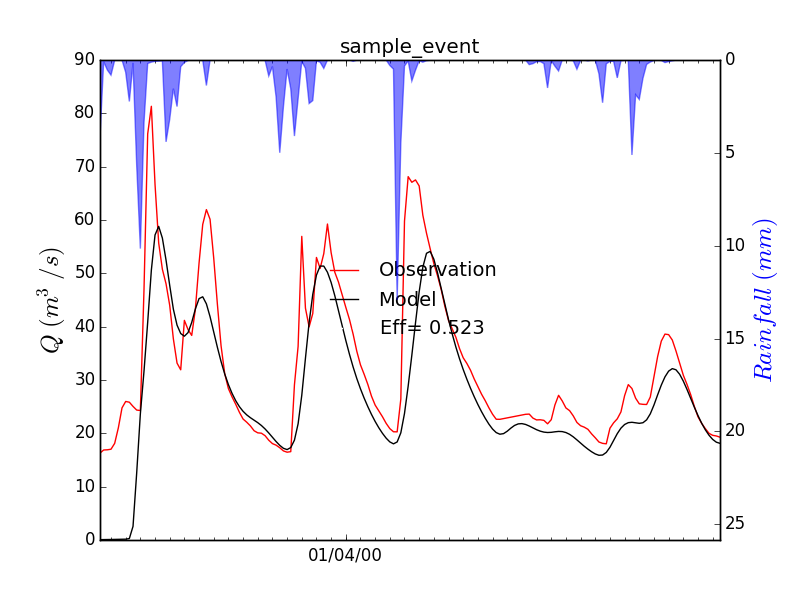

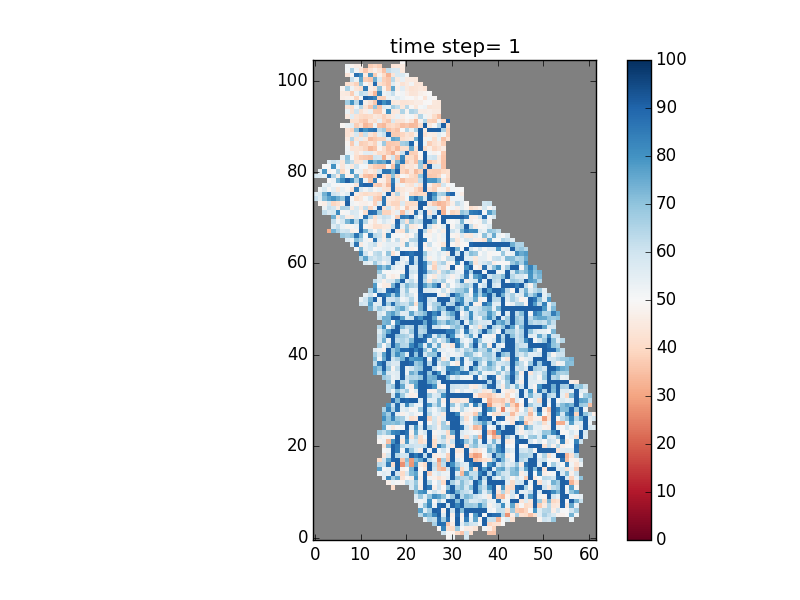

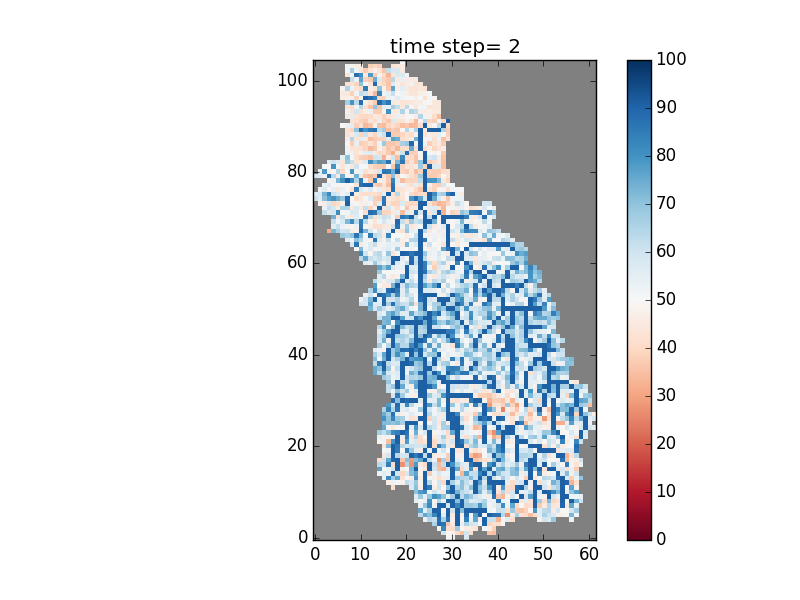

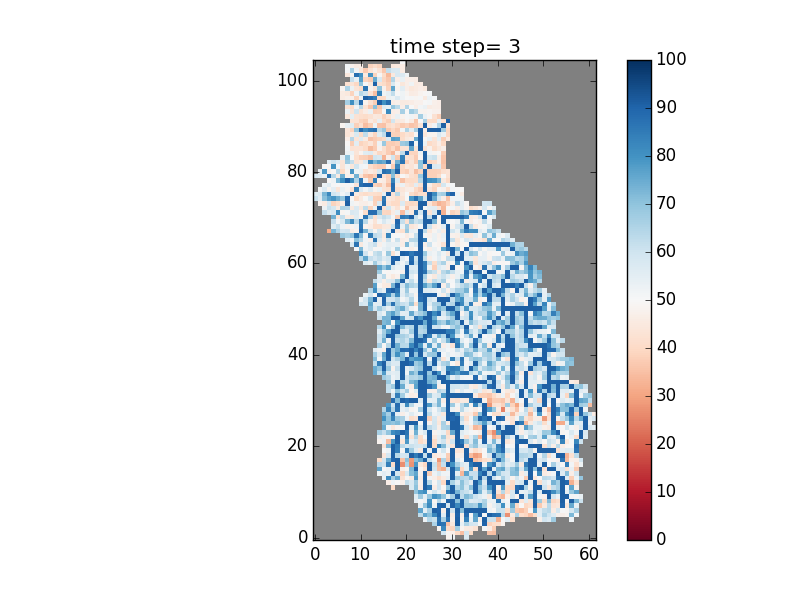

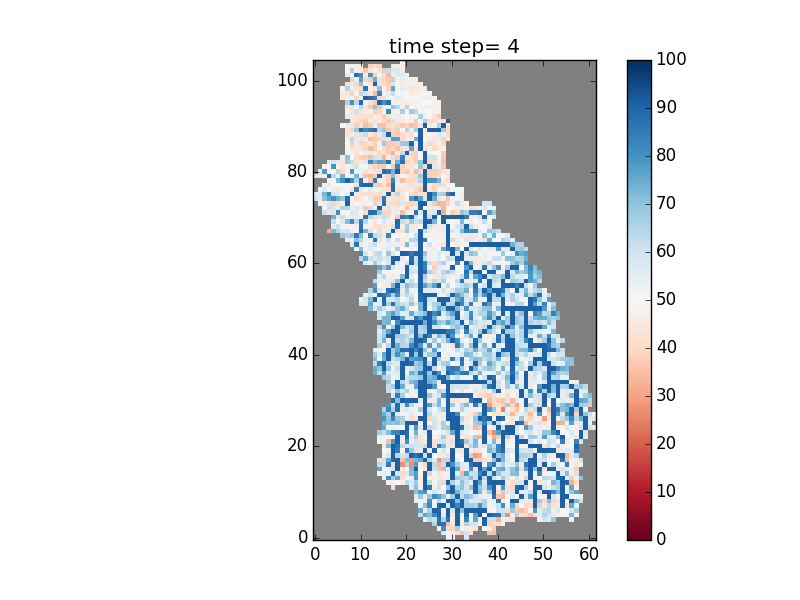

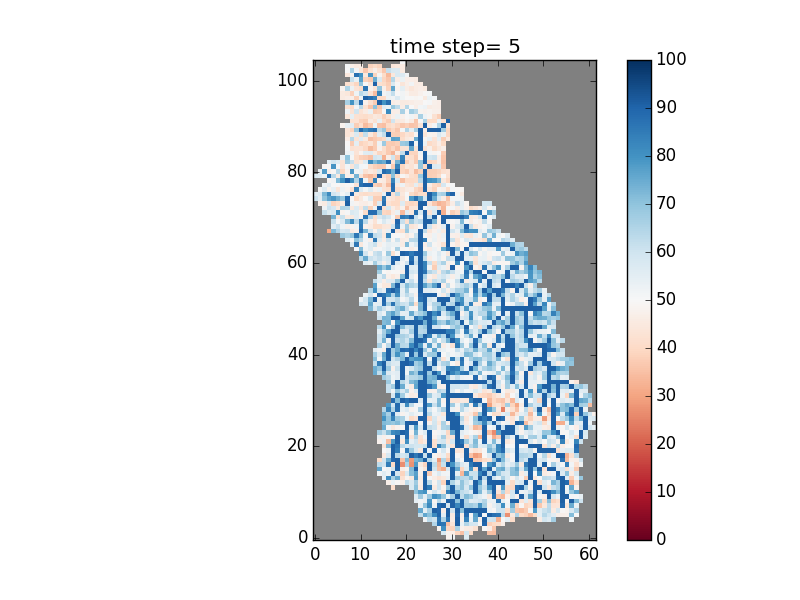

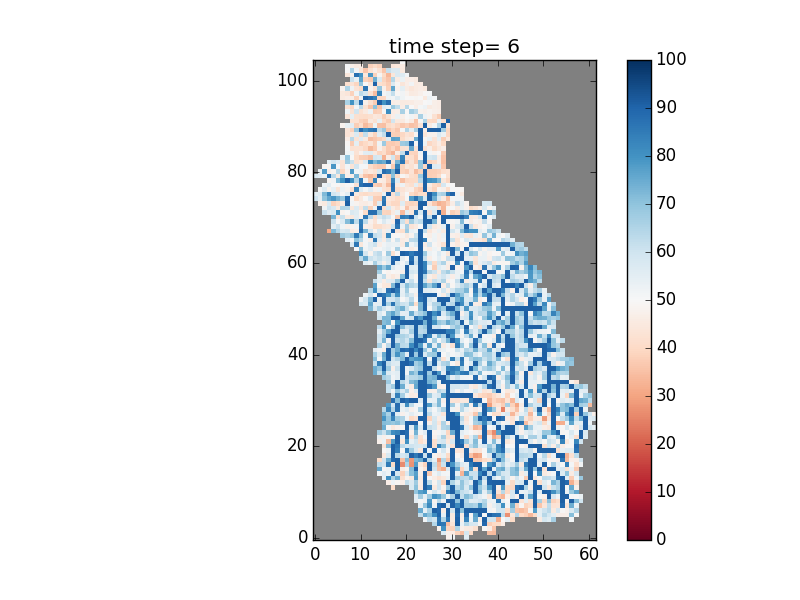

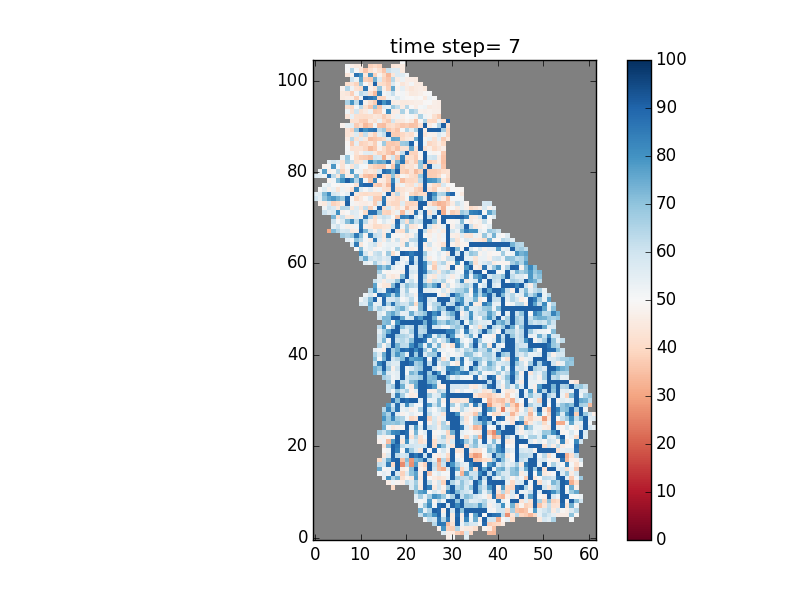

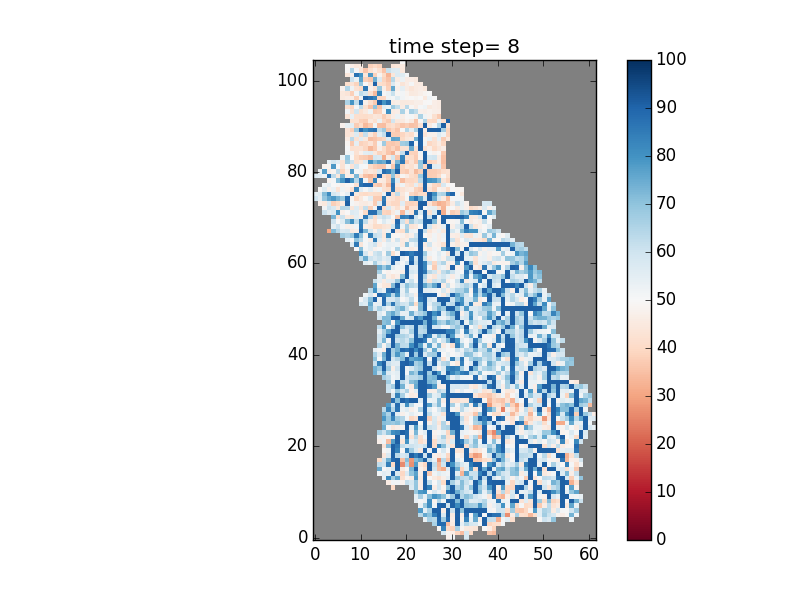

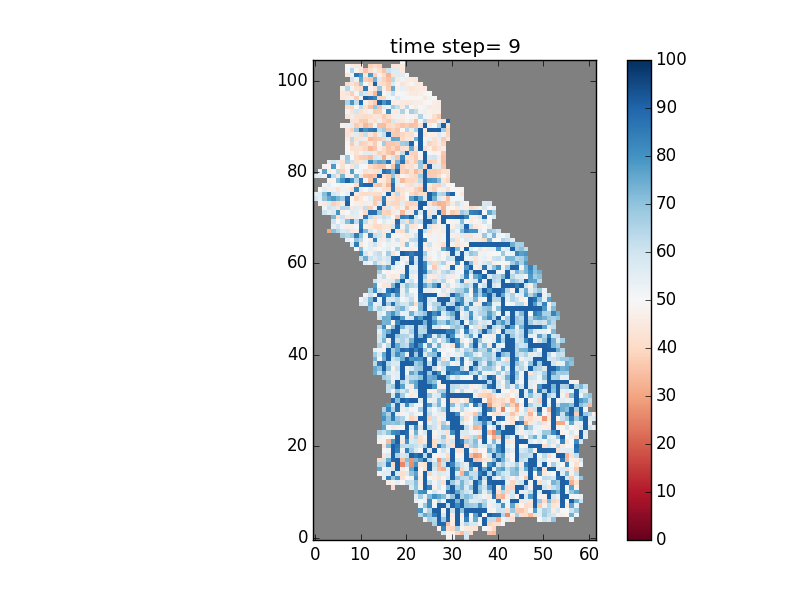

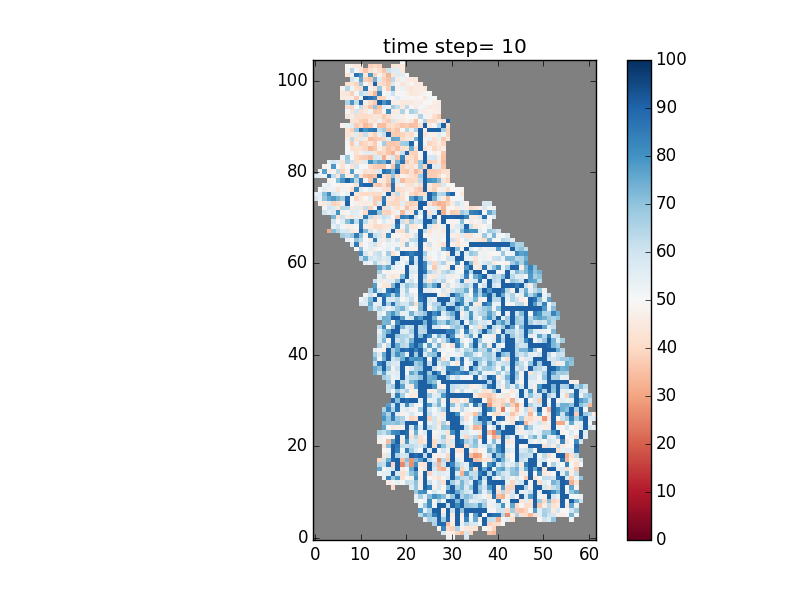

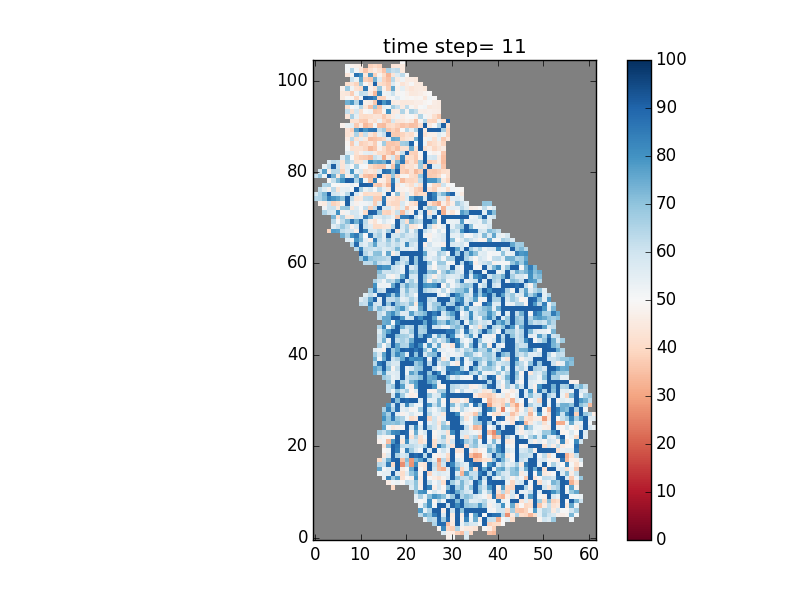

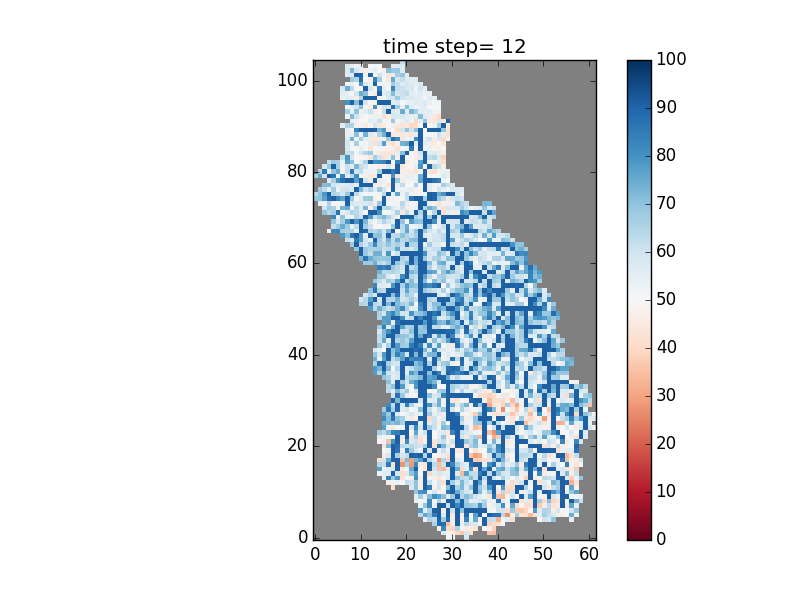

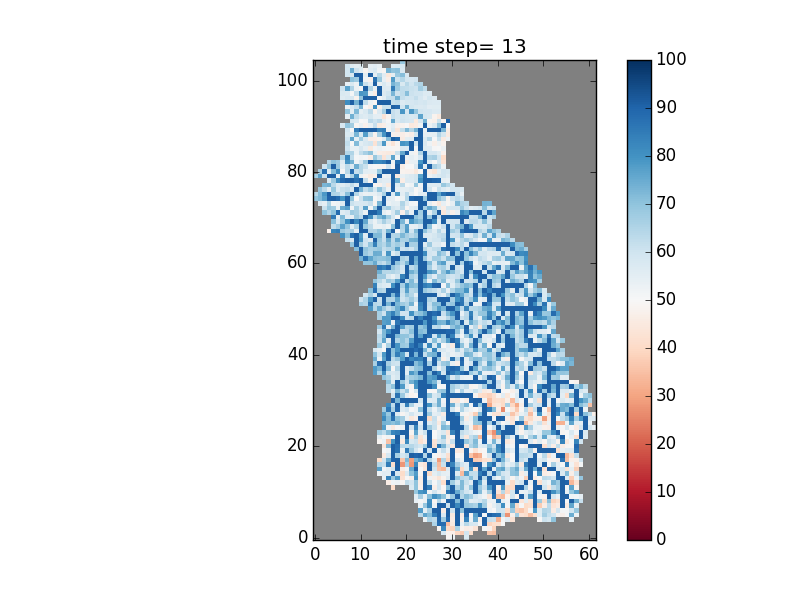

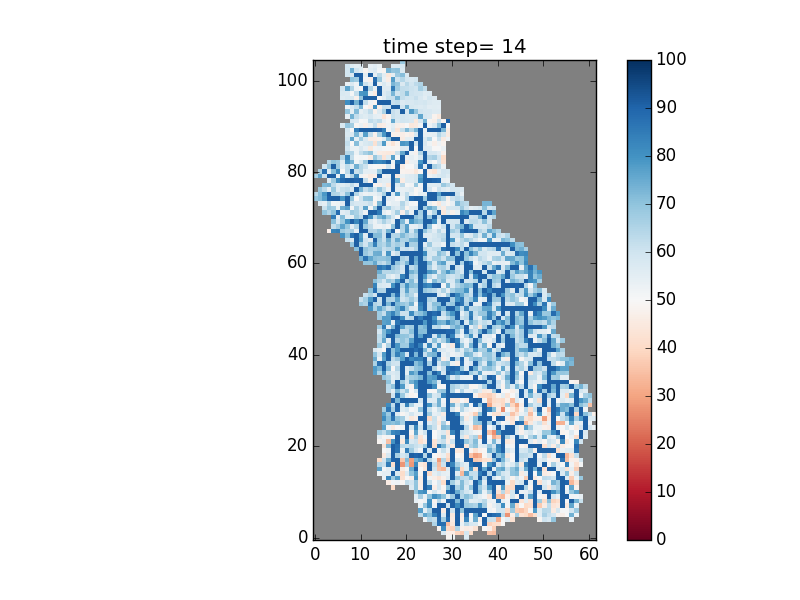

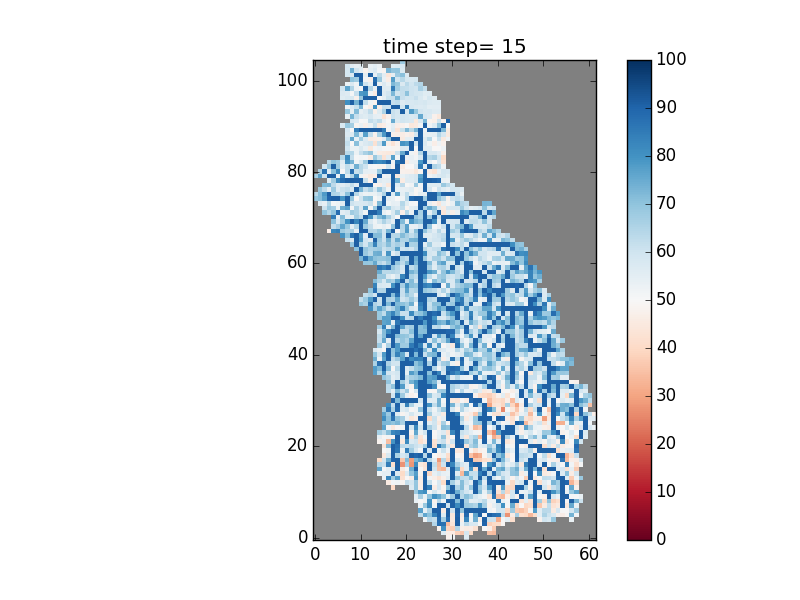

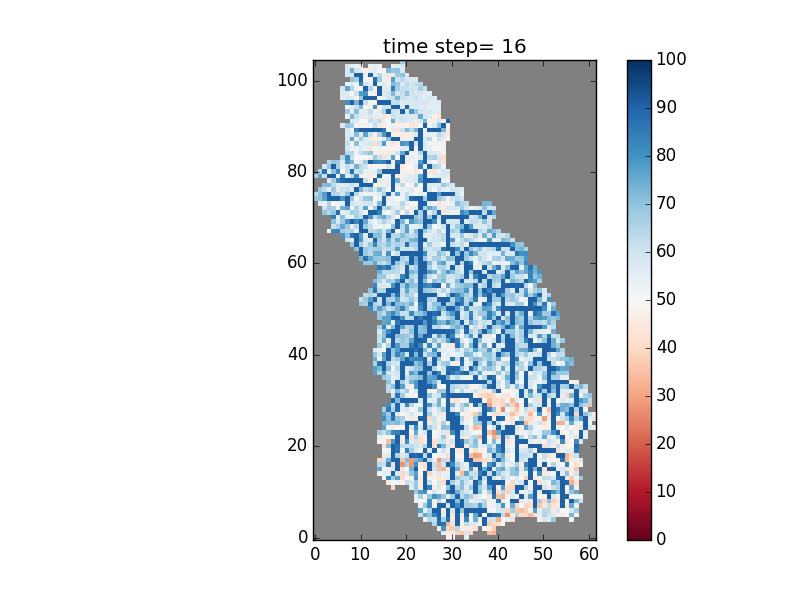

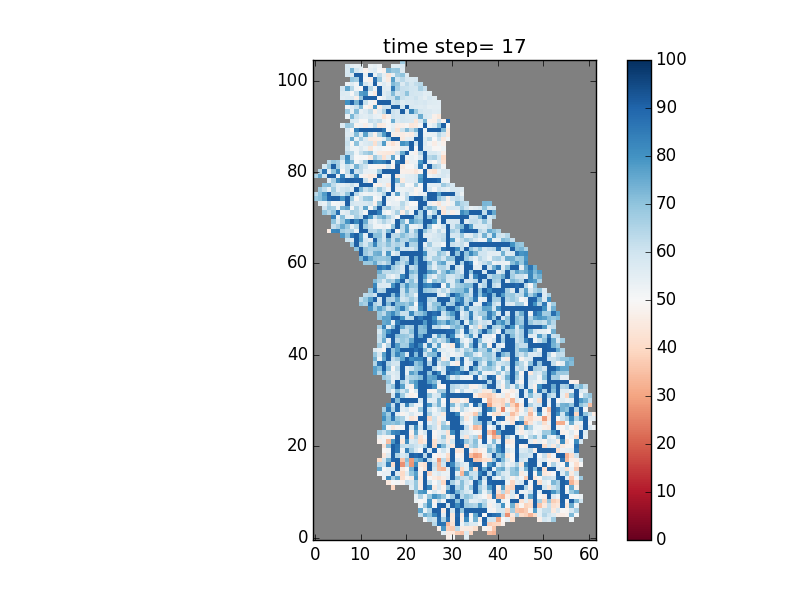

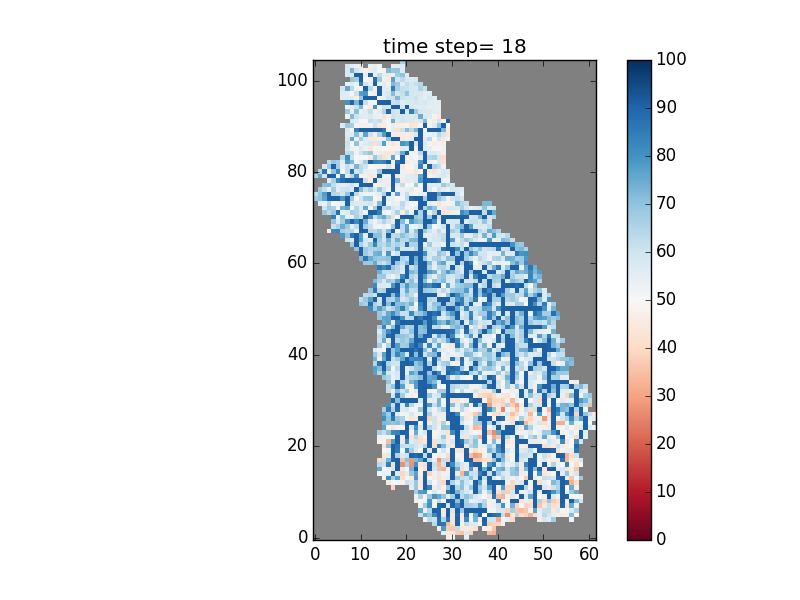

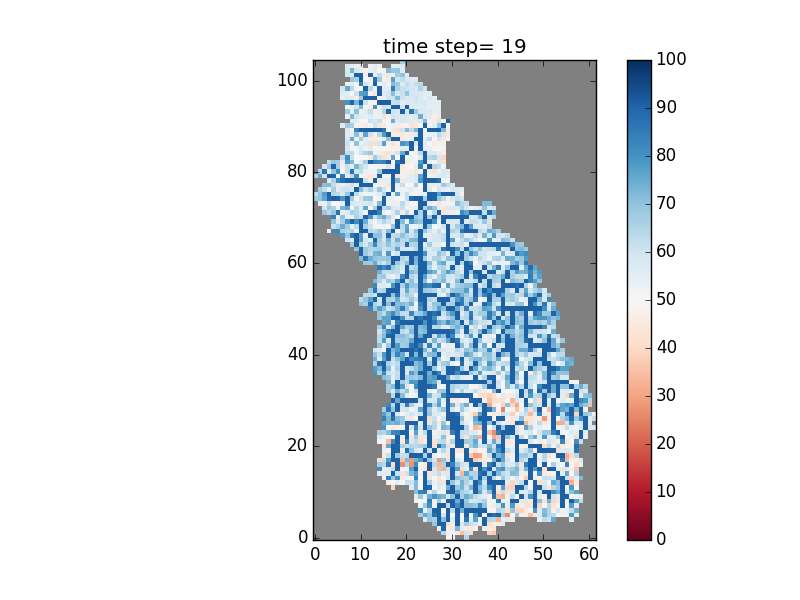

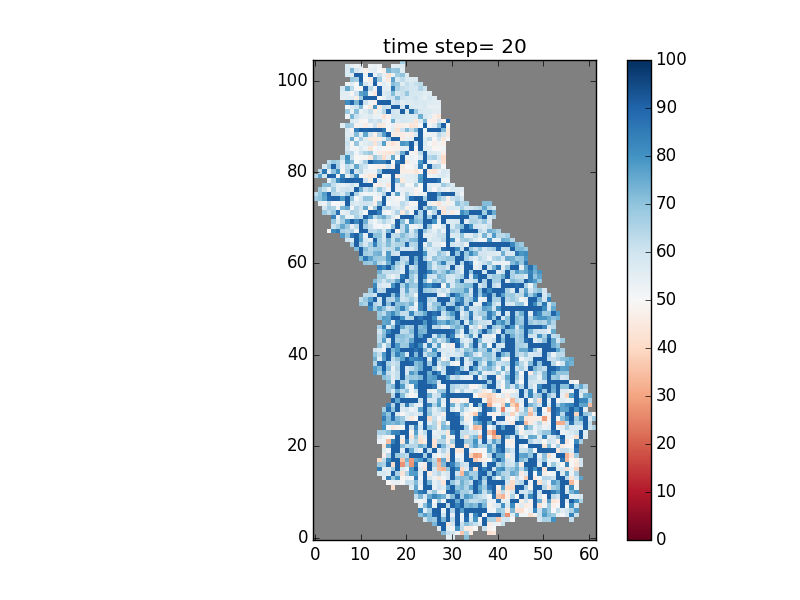

In [31]:
#And now we visualize the results!
from IPython.display import display, Image
    
os.chdir(local_root)
os.chdir("analysis-"+model_run_uuid)
graphics = os.listdir("graphics")
print graphics
maps = os.listdir("maps")
print maps

for ima in graphics:
    display(Image(filename="graphics/"+ima))
    
for ima in maps:
    display(Image(filename="maps/"+ima))

os.chdir(local_root)